In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [4]:
df=pd.read_csv('dataset/train.csv')
df.head(2)

,Cust_ID,Churn,Name,Longevity,Year_Birth,TypeTravel,RoomType,RewardPoints,Comfort,ReceptionSchedule,...,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService
0,1,churn,Ms. Nicole Clarke,yes,1974.0,business,single,4907,3,4,...,4,3,4,3,3,3,3,4,3,4
1,2,nochurn,Mr. Jesse Scott,yes,1965.0,business,single,6724,1,1,...,5,3,4,5,5,5,5,1,5,2


In [5]:
df[df.duplicated(keep = False)] 

,Cust_ID,Churn,Name,Longevity,Year_Birth,TypeTravel,RoomType,RewardPoints,Comfort,ReceptionSchedule,...,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService


In [6]:
df.set_index('Cust_ID', inplace = True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15589 entries, 1 to 15589
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Churn              15589 non-null  object 
 1   Name               15589 non-null  object 
 2   Longevity          15589 non-null  object 
 3   Year_Birth         15394 non-null  float64
 4   TypeTravel         15589 non-null  object 
 5   RoomType           15589 non-null  object 
 6   RewardPoints       15589 non-null  int64  
 7   Comfort            15589 non-null  int64  
 8   ReceptionSchedule  15589 non-null  int64  
 9   FoodDrink          15589 non-null  int64  
 10  Location           15589 non-null  int64  
 11  Wifi               15589 non-null  int64  
 12  Amenities          15589 non-null  int64  
 13  Staff              15589 non-null  int64  
 14  OnlineBooking      15589 non-null  int64  
 15  PriceQuality       15589 non-null  int64  
 16  RoomSpace          155

In [12]:
stats = df.describe()
stats.loc['skew'] = df.skew().tolist()
stats.loc['kurt'] = df.kurtosis().tolist()
stats.T

C:\Users\m13ar\AppData\Local\Temp/ipykernel_13384/2049408207.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  stats.loc['skew'] = df.skew().tolist()
C:\Users\m13ar\AppData\Local\Temp/ipykernel_13384/2049408207.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  stats.loc['kurt'] = df.kurtosis().tolist()


,count,mean,std,min,25%,50%,75%,max,skew,kurt
Year_Birth,15394.0,1981.706444,15.179042,1936.0,1970.0,1981.0,1994.0,2014.0,-0.003847,-0.729800
RewardPoints,15589.0,5022.593816,1027.962379,409.0,4445.0,5088.0,5649.0,6950.0,-0.453779,0.260135
Comfort,15589.0,2.841619,1.388624,0.0,2.0,3.0,4.0,5.0,-0.100907,-0.935544
ReceptionSchedule,15589.0,2.997242,1.518994,0.0,2.0,3.0,4.0,5.0,-0.260705,-1.077243
FoodDrink,15589.0,2.844570,1.436948,0.0,2.0,3.0,4.0,5.0,-0.123610,-0.967047
Location,15589.0,2.986016,1.299438,1.0,2.0,3.0,4.0,5.0,-0.050229,-1.076583
Wifi,15589.0,3.245109,1.327026,0.0,2.0,3.0,4.0,6.0,-0.171255,-1.111251
Amenities,15589.0,3.374816,1.352417,0.0,2.0,4.0,4.0,5.0,-0.599498,-0.540657
Staff,15589.0,3.506383,1.319565,1.0,3.0,4.0,5.0,5.0,-0.554561,-0.858889
OnlineBooking,15589.0,3.454231,1.310343,0.0,2.0,4.0,5.0,5.0,-0.472074,-0.931811


In [61]:
df.columns

Index(['Churn', 'Name', 'Longevity', 'Year_Birth', 'TypeTravel', 'RoomType',
       'RewardPoints', 'Comfort', 'ReceptionSchedule', 'FoodDrink', 'Location',
       'Wifi', 'Amenities', 'Staff', 'OnlineBooking', 'PriceQuality',
       'RoomSpace', 'CheckOut', 'Checkin', 'Cleanliness', 'BarService'],
      dtype='object')

In [134]:
df['Year_Birth'].fillna(df['Year_Birth'].mode()[0], inplace=True)
out = df[['Year_Birth','RewardPoints', 'Comfort', 'ReceptionSchedule', 'FoodDrink', 'Location', 'Wifi', 'Amenities','Staff', 'OnlineBooking', 'PriceQuality', 'RoomSpace', 'CheckOut', 'Checkin', 'Cleanliness', 'BarService']]

In [135]:
def detect_outliers_zscore(data):
    outliers = []
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return len(outliers)

In [136]:
detect_outliers_zscore(df.Wifi)

0

In [239]:
outliers = []

for ind, column in enumerate(out.columns):
    z = 0
    z = detect_outliers_zscore(out[column])
    print(ind, column, z, z/len(df)*100)

0 Year_Birth 2 0.012829559304637885
1 RewardPoints 87 0.558085829751748
2 Comfort 0 0.0
3 ReceptionSchedule 0 0.0
4 FoodDrink 0 0.0
5 Location 0 0.0
6 Wifi 0 0.0
7 Amenities 0 0.0
8 Staff 0 0.0
9 OnlineBooking 0 0.0
10 PriceQuality 0 0.0
11 RoomSpace 0 0.0
12 CheckOut 0 0.0
13 Checkin 0 0.0
14 Cleanliness 0 0.0
15 BarService 0 0.0


Text(0.5, 1.0, 'Year_Birth')

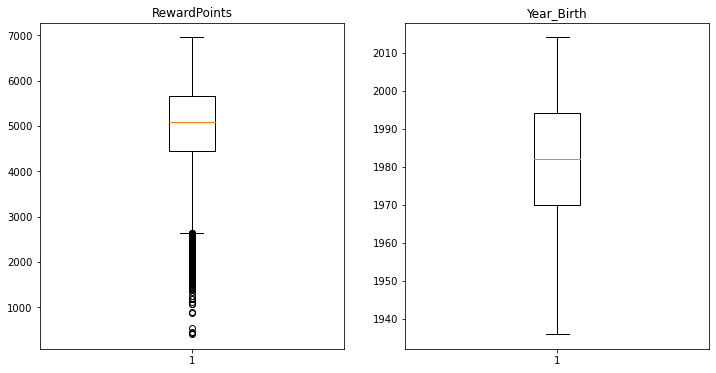

In [138]:
fig, axs = plt.subplots(1, 2, figsize = (12,6))

axs[0].boxplot(data = df, x = 'RewardPoints')
axs[0].set_title('RewardPoints')
axs[1].boxplot(data = df, x = 'Year_Birth')
axs[1].set_title('Year_Birth')

In [144]:
outliersIQR = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliersIQR.append(i)
    return len(outliers)
detect_outliers_iqr(df.Year_Birth)


0

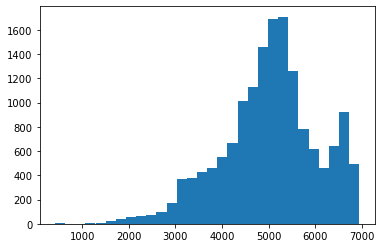

In [155]:
plt.hist(df.RewardPoints, bins = 30)
plt.show()

In [233]:
p1 = np.percentile(df.RewardPoints, 2.5)
c = np.where( df.RewardPoints<p1, p1,  df.RewardPoints)
c

array([4907., 6724., 4365., ..., 4046., 5155., 5136.])

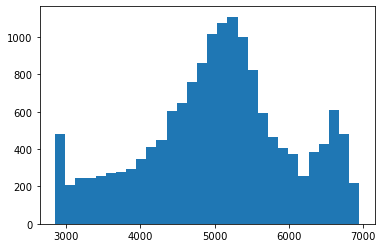

In [234]:
plt.hist(c, bins = 30)
plt.show()

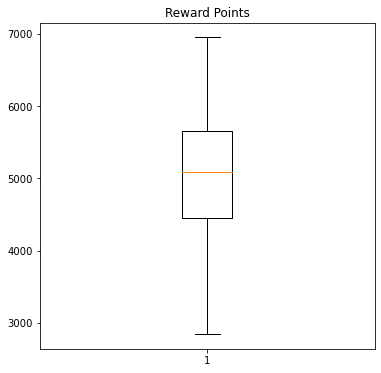

In [235]:
fig = plt.figure(figsize =(6, 6))
plt.boxplot(c)
plt.title("Reward Points")
plt.show()

In [240]:
p1 = np.percentile(df.RewardPoints, 2.5)
d = np.where(df.RewardPoints<p1, df.RewardPoints.median(),  df.RewardPoints)
d

array([4907., 6724., 4365., ..., 4046., 5155., 5136.])

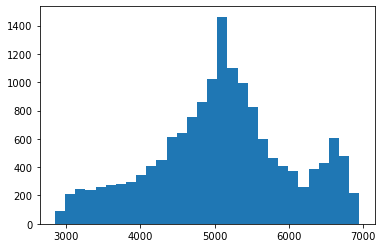

In [241]:
plt.hist(d, bins = 30)
plt.show()

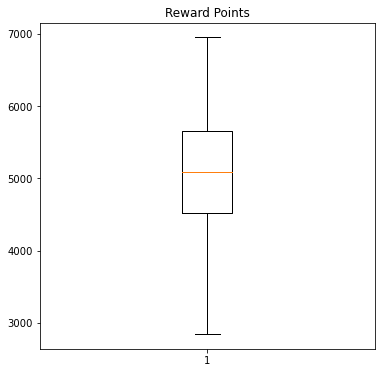

In [242]:
fig = plt.figure(figsize =(6, 6))
plt.boxplot(d)
plt.title("Reward Points")
plt.show()

In [243]:
RP = pd.DataFrame(d)

In [244]:
RP.skew()

0   -0.131391
dtype: float64